(40, 10, 10000)


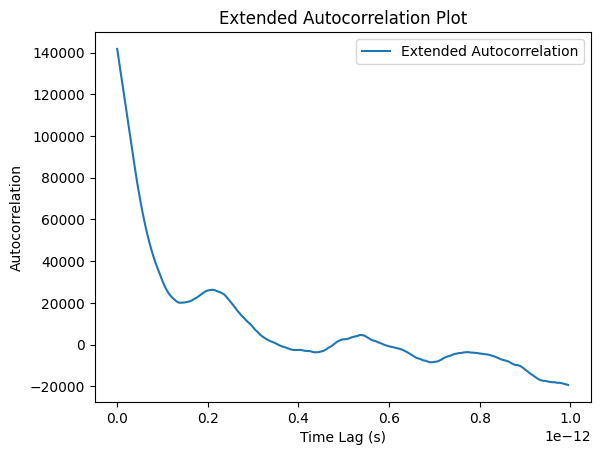

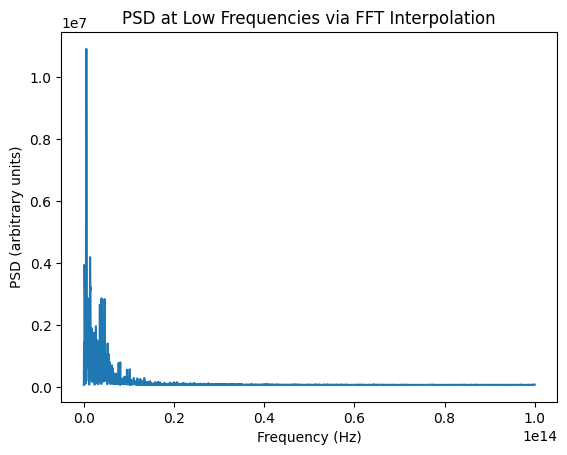

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)
Jx_grid = np.load(
    r"D:\Personal\ETH\FS 2025\Master Thesis\Simulations\Jx_tee5e-14_timp5e-11_short_low_n.npy"
)
print(Jx_grid.shape)
center_ix = int(Jx_grid.shape[0] / 2)
center_iy = int(Jx_grid.shape[1] / 2)

# Autocorrelation for a selected pixel and normalization
pixel_data = Jx_grid[center_ix, center_iy, :]
transient = int(0.5 * steps)  # Remove initial transient

# pixel_data = pixel_data[transient:]
pixel_data = np.sum(Jx_grid[center_ix, :, transient:], axis=0)
pixel_data = pixel_data / Jx_grid.shape[1]

# Compute autocorrelation
corr = np.correlate(
    pixel_data - np.mean(pixel_data), pixel_data - np.mean(pixel_data), mode="full"
)
corr = corr[corr.size // 2 :]
time_lags = np.arange(len(corr)) * dt

# Plot Autocorrelation
plt.figure()
plt.plot(time_lags[:200], corr[:200], label="Autocorrelation")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Plot")
plt.legend()
plt.show()


# Compute the FFT of the original correlation data (no manual zero-padding)
psd_orig = np.fft.rfft(corr)
freq_orig = np.fft.rfftfreq(len(corr), d=dt)

# Define a fine frequency grid for low frequencies (e.g., up to 1e9 Hz)
fine_freq = np.linspace(0, 1e14, 10000)  # adjust number of points as needed

# Interpolate the FFT result onto the fine frequency grid
psd_fine = np.interp(fine_freq, freq_orig, np.real(psd_orig))

plt.figure()
plt.plot(fine_freq, psd_fine)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (arbitrary units)")
plt.title("PSD at Low Frequencies via FFT Interpolation")
plt.show()

(40, 10, 10000)


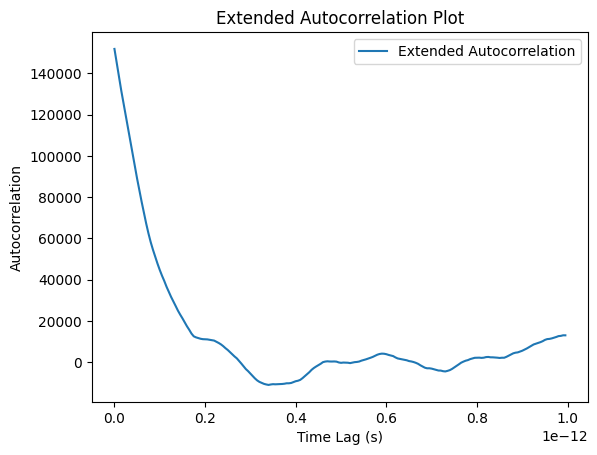

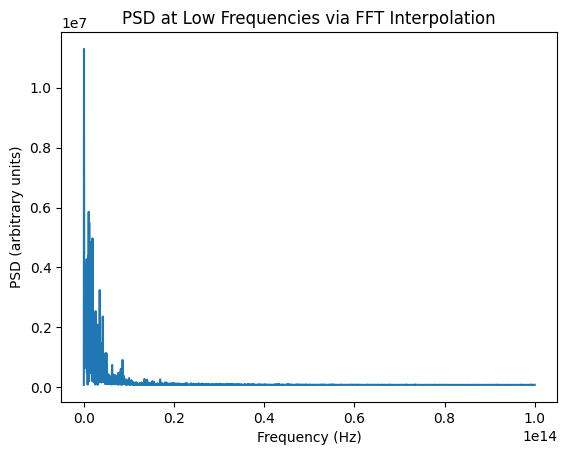

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)
Jx_grid = np.load(
    r"D:\Personal\ETH\FS 2025\Master Thesis\Simulations\Jx_tee5e-13_timp5e-11_short_low_n.npy"
)
print(Jx_grid.shape)
center_ix = int(Jx_grid.shape[0] / 2)
center_iy = int(Jx_grid.shape[1] / 2)

# Autocorrelation for a selected pixel and normalization
pixel_data = Jx_grid[center_ix, center_iy, :]
transient = int(0.5 * steps)  # Remove initial transient

# pixel_data = pixel_data[transient:]
pixel_data = np.sum(Jx_grid[center_ix, :, transient:], axis=0)
pixel_data = pixel_data / Jx_grid.shape[1]

# Compute autocorrelation
corr = np.correlate(
    pixel_data - np.mean(pixel_data), pixel_data - np.mean(pixel_data), mode="full"
)
corr = corr[corr.size // 2 :]
time_lags = np.arange(len(corr)) * dt

# Plot Autocorrelation
plt.figure()
plt.plot(time_lags[:200], corr[:200], label="Extended Autocorrelation")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Extended Autocorrelation Plot")
plt.legend()
plt.show()


# Compute the FFT of the original correlation data (no manual zero-padding)
psd_orig = np.fft.rfft(corr)
freq_orig = np.fft.rfftfreq(len(corr), d=dt)

# Define a fine frequency grid for low frequencies (e.g., up to 1e9 Hz)
fine_freq = np.linspace(0, 1e14, 10000)  # adjust number of points as needed

# Interpolate the FFT result onto the fine frequency grid
psd_fine = np.interp(fine_freq, freq_orig, np.real(psd_orig))

plt.figure()
plt.plot(fine_freq, psd_fine)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (arbitrary units)")
plt.title("PSD at Low Frequencies via FFT Interpolation")
plt.show()

Jx_grid shape: (40, 10, 10000)


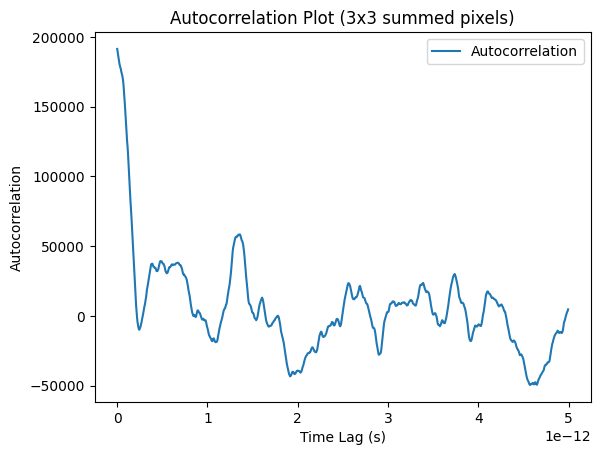

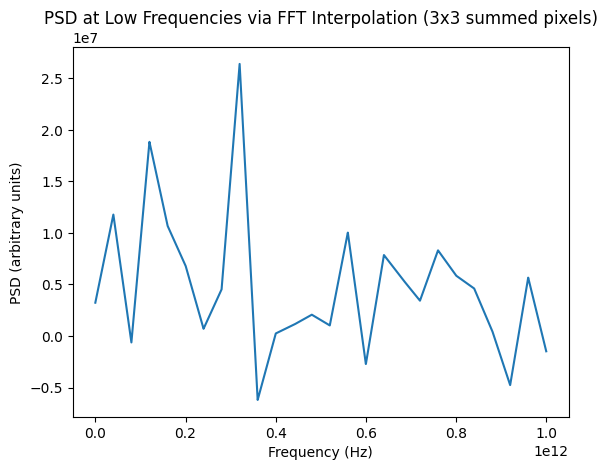

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)
Jx_grid = np.load(
    r"D:\Personal\ETH\FS 2025\Master Thesis\Simulations\Jx_tee5e-14_timp5e-11_short_low_n.npy"
)
print("Jx_grid shape:", Jx_grid.shape)
center_ix = int(Jx_grid.shape[0] / 2)
center_iy = int(Jx_grid.shape[1] / 2)
transient = int(0.5 * steps)

block = Jx_grid[
    center_ix - 1 : center_ix + 2, center_iy - 1 : center_iy + 2, transient:
]

corr = np.zeros(block.shape[2] * 2 - 1)
for i in range(3):
    for j in range(3):
        corr += np.correlate(
            block[1, 1, :] - np.mean(block[1, 1, :]),
            block[i, j, :] - np.mean(block[i, j, :]),
            mode="full",
        )


corr = corr / 9
corr = corr[corr.size // 2 :]
time_lags = np.arange(len(corr)) * dt


plt.figure()
plt.plot(time_lags[:1000], corr[:1000], label="Autocorrelation")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Plot (3x3 summed pixels)")
plt.legend()
plt.show()

psd_orig = np.fft.rfft(corr)
freq_orig = np.fft.rfftfreq(len(corr), d=dt)

fine_freq = np.linspace(0, 1e12, 10000)
psd_fine = np.interp(fine_freq, freq_orig, np.real(psd_orig))

plt.figure()
plt.plot(fine_freq, psd_fine)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (arbitrary units)")
plt.title("PSD at Low Frequencies via FFT Interpolation (3x3 summed pixels)")
plt.show()

Jx_grid shape: (40, 10, 10000)


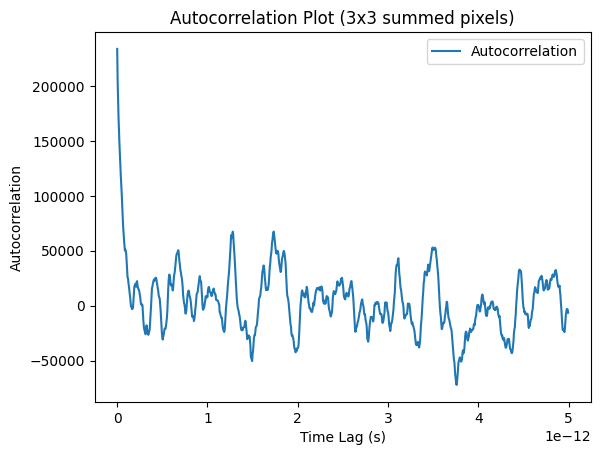

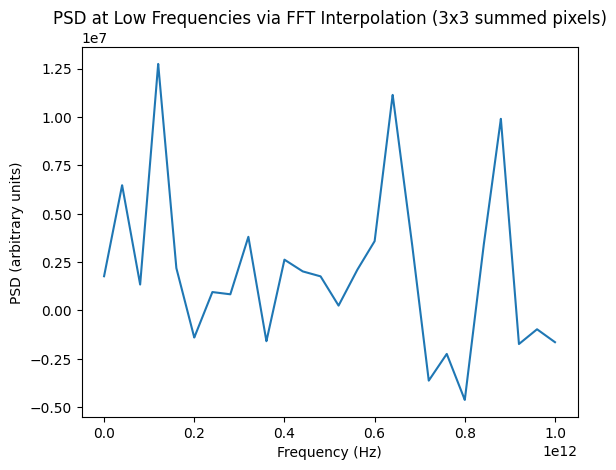

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)
Jx_grid = np.load(
    r"D:\Personal\ETH\FS 2025\Master Thesis\Simulations\Jx_tee5e-14_timp5e-14_short_low_n.npy"
)
print("Jx_grid shape:", Jx_grid.shape)
center_ix = int(Jx_grid.shape[0] / 2)
center_iy = int(Jx_grid.shape[1] / 2)
transient = int(0.5 * steps)

block = Jx_grid[
    center_ix - 1 : center_ix + 2, center_iy - 1 : center_iy + 2, transient:
]

corr = np.zeros(block.shape[2] * 2 - 1)
for i in range(3):
    for j in range(3):
        corr += np.correlate(
            block[1, 1, :] - np.mean(block[1, 1, :]),
            block[i, j, :] - np.mean(block[i, j, :]),
            mode="full",
        )

corr = corr / 9
corr = corr[corr.size // 2 :]
time_lags = np.arange(len(corr)) * dt


plt.figure()
plt.plot(time_lags[:1000], corr[:1000], label="Autocorrelation")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Plot (3x3 summed pixels)")
plt.legend()
plt.show()

psd_orig = np.fft.rfft(corr)
freq_orig = np.fft.rfftfreq(len(corr), d=dt)

fine_freq = np.linspace(0, 1e12, 10000)
psd_fine = np.interp(fine_freq, freq_orig, np.real(psd_orig))

plt.figure()
plt.plot(fine_freq, psd_fine)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (arbitrary units)")
plt.title("PSD at Low Frequencies via FFT Interpolation (3x3 summed pixels)")
plt.show()